# Lending Club Case Study 

## Introduction

This Case study helps to understand how real business problems are solved using Exploratory Data Analysis (EDA).
It is a practical way to learn how data-driven decisions are made in the business world.


## Goal
Minimise the risk of financial loss when lending money to customers. 

## Business Objectives
This company is the largest online loan marketplace, offering personal, business, and medical procedure loans with lower interest rates through a quick online platform. However, lending to risky borrowers can lead to significant financial loss, known as credit loss, when borrowers default or fail to repay. Identifying these risky applicants can help reduce such losses. The goal of this case study is to use EDA to find the factors that indicate a higher likelihood of loan default, helping the company improve its risk assessment and loan portfolio management.

## Risk Associated with the Problem
 - If an applicant is likely to repay the loan, rejecting their loan request means losing a business opportunity.
 - If an applicant is unlikely to repay the loan, approving their loan could result in a financial loss.

The dataset provided includes details of past loans, with each row representing the loan information of individual applicants.

# Overall approach of the analysis
- Data Understanding
- Data Cleaning and preparing the data for analysis by handling missing values, correcting errors, and transforming variables if necessary.
- Data Visualization and Analysis
- Conclusion: Summarize the key findings and insights derived from the analysis.

### Loading Libraries and Data

In [217]:
# Libraries for data manipulation
import pandas as pd #dataframe
import numpy as np #numerical python

# Libraries for data visualization
import seaborn as sns #data visualization
import matplotlib.pyplot as plt #plotting


#import plotly.express as px #plotting > Review

#Was getting bellow DtypeWarning , assuming this is because of unprocessed dataset
#/var/folders/tz/cj93smcj34sfvbdvkmzr41500000gq/T/ipykernel_44150/952260356.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
#to resolve this I have imported Warning library to ignore some warning 

import warnings #warning
warnings.filterwarnings('ignore')

In [218]:
#Loading the data and data dictionary
ln_DataSet = pd.read_csv("loan.csv")
ln_DataDict = pd.read_excel("Data_Dictionary.xlsx")

### DataSet Analysis

In [219]:
# Printing the data set(first 10 rows)
ln_DataSet.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [220]:
# Printing the data dictionary(first 10 rows)
ln_DataDict.head(10)

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...
5,annual_inc_joint,The combined self-reported annual income provi...
6,application_type,Indicates whether the loan is an individual ap...
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/...


### Basic infomation about the datase


In [221]:
# Columns in the dataframe
print(ln_DataSet.columns)
print(ln_DataSet.shape)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)
(39717, 111)


In [222]:
# Data types of each column
print(ln_DataSet.dtypes)

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object


In [223]:
# Describing the dataset
print(ln_DataSet.describe())

                 id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170000   
50%   

In [224]:

## Total rows and columns
print('Columns:',ln_DataSet.shape[1])
print('Rows:',ln_DataSet.shape[0])
## Total missing values
print('Missing values:',ln_DataSet.isnull().sum().sum())
## Totalunique values
print('Unique values:',ln_DataSet.nunique().sum())
## Total duplicates
print('Duplicates:',ln_DataSet.duplicated().sum())

Columns: 111
Rows: 39717
Missing values: 2263366
Unique values: 416800
Duplicates: 0


### Data Cleaning of Columns and Rows

In [225]:
## Checking for missing values
print(ln_DataSet.isnull().sum())

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64


In [226]:
# Checking column with large amount of null values(in percentage) and irrelevant columns
print((ln_DataSet.isnull().sum()/ln_DataSet.shape[0]*100).round(2).sort_values(ascending=False))

verification_status_joint    100.0
annual_inc_joint             100.0
mo_sin_old_rev_tl_op         100.0
mo_sin_old_il_acct           100.0
bc_util                      100.0
                             ...  
delinq_amnt                    0.0
policy_code                    0.0
earliest_cr_line               0.0
delinq_2yrs                    0.0
id                             0.0
Length: 111, dtype: float64


In [227]:
# Removing column with 50% or more null values as it will reduce the impact on analysis
ln_DataSet = ln_DataSet.loc[:,ln_DataSet.isnull().sum()/ln_DataSet.shape[0]*100<50]
# Shape of the dataframe after removing columns
print(ln_DataSet.shape)

(39717, 54)


Removed columns with more than 50% missing data to improve the accuracy . Columns No changed from 111 to 54 . it may vary with precision changes.

In [228]:
# Checking columns again for null value percentage
print((ln_DataSet.isnull().sum()/ln_DataSet.shape[0]*100).round(2).sort_values(ascending=False))

desc                          32.59
emp_title                      6.19
emp_length                     2.71
pub_rec_bankruptcies           1.75
last_pymnt_d                   0.18
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
revol_util                     0.13
tax_liens                      0.10
title                          0.03
last_credit_pull_d             0.01
total_rec_prncp                0.00
out_prncp                      0.00
initial_list_status            0.00
out_prncp_inv                  0.00
total_acc                      0.00
total_pymnt                    0.00
total_pymnt_inv                0.00
collection_recovery_fee        0.00
total_rec_int                  0.00
total_rec_late_fee             0.00
recoveries                     0.00
pub_rec                        0.00
last_pymnt_amnt                0.00
policy_code                    0.00
application_type               0.00
acc_now_delinq                 0.00
delinq_amnt                 

In [229]:
print("Max Missing value in a Row",(ln_DataSet.isnull().sum(axis=1)).max())


Max Missing value in a Row 6


#### Since the number of missing values per row is very low compared to the 54 remaining columns
#### Not doing further Row cleaning as impact is minimal.

In [230]:
# Columns in the dataframe
print(ln_DataSet.columns)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')


### Dropping few columns , which are not adding much info as per current undersatanding

In [231]:
# We already have id already for unique identification can drop member id
ln_DataSet=ln_DataSet.drop(['member_id'],axis=1)

# infomration which might not have significance to the conclusions
ln_DataSet=ln_DataSet.drop(['title','url','desc','emp_title'],axis=1)

# Removing zip_code as it is a masked data and cannot be used as input for the analysis ex - 860xx
ln_DataSet=ln_DataSet.drop(['zip_code'],axis=1)

# Removing irrelevant columns which are calculated after loan is approved thus have no relevance to the analysis
ln_DataSet=ln_DataSet.drop(['inq_last_6mths','revol_bal','delinq_2yrs','earliest_cr_line','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','open_acc','pub_rec','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','application_type'],axis=1)


In [232]:
# Drop columns for irrelevant data which has no impact to analysis(having very few unqiue values)
print(ln_DataSet.nunique().sort_values(ascending=True))
ln_DataSet = ln_DataSet.loc[:,ln_DataSet.nunique()>1]

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
term                              2
verification_status               3
pub_rec_bankruptcies              3
loan_status                       3
home_ownership                    5
grade                             7
emp_length                       11
purpose                          14
sub_grade                        35
addr_state                       50
issue_d                          55
int_rate                        371
loan_amnt                       885
funded_amnt                    1041
dti                            2868
annual_inc                     5318
funded_amnt_inv                8205
installment                   15383
id                            39717
dtype: int64




### Fixing the null values


In [233]:
# missing values 
print(ln_DataSet.isnull().sum().sort_values(ascending=False))

emp_length              1075
pub_rec_bankruptcies     697
funded_amnt                0
annual_inc                 0
dti                        0
addr_state                 0
purpose                    0
loan_status                0
issue_d                    0
verification_status        0
home_ownership             0
funded_amnt_inv            0
loan_amnt                  0
sub_grade                  0
grade                      0
installment                0
int_rate                   0
term                       0
id                         0
dtype: int64


In [234]:
# Checking values 
print(ln_DataSet.emp_length.value_counts())


emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64


In [235]:
# Checking values 
print(ln_DataSet.pub_rec_bankruptcies.value_counts())

pub_rec_bankruptcies
0.0    37339
1.0     1674
2.0        7
Name: count, dtype: int64


In [236]:
# droping null values in emp_length columns, As for column 'emp_length' there are variation in employment
#length adding anything as per assumption  may  cause data impurity.
ln_DataSet = ln_DataSet.dropna(subset=['emp_length'])
# Shape of the dataframe after removing columns
print(ln_DataSet.shape)

(38642, 19)


In [237]:
# Inserting 0 for null values in pub_rec_bankruptcies column, as most  values are 0 which can be substituted in place of null 
ln_DataSet.pub_rec_bankruptcies.fillna(0,inplace=True)

In [238]:
# Checking for missing values 
print(ln_DataSet.isnull().sum())

id                      0
loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
addr_state              0
dti                     0
pub_rec_bankruptcies    0
dtype: int64


### Removing duplicate rows from the dataframe

In [239]:
# Removing duplicate rows
ln_DataSet = ln_DataSet.drop_duplicates()

### Correcting Data Types and Deriving New Columns

In [240]:
# Correcting data type and format for columns in the dataframe
## Derving more columns with the conversion of data type
ln_DataSet.term=ln_DataSet.term.apply(lambda x: int(x.replace(' months',''))).astype(int)
ln_DataSet.int_rate=ln_DataSet.int_rate.apply(lambda x:str(x).replace('%','')).astype('float').round(2)
#ln_DataSet.grade=ln_DataSet.grade.astype('category')
#ln_DataSet.sub_grade=ln_DataSet.sub_grade.astype('category')
ln_DataSet.emp_length=ln_DataSet.emp_length.apply(lambda x: x.replace('years','').replace('+','').replace('< 1','0.5').replace('year','')).astype(float)
#ln_DataSet.home_ownership=ln_DataSet.home_ownership.astype('category')
ln_DataSet.verification_status=ln_DataSet.verification_status.astype('category')
ln_DataSet.issue_d=pd.to_datetime(ln_DataSet.issue_d,format='%b-%y')
ln_DataSet['issue_year']=pd.to_datetime(ln_DataSet.issue_d,format='%b-%y').dt.year
ln_DataSet['issue_month']=pd.to_datetime(ln_DataSet.issue_d,format='%b-%y').dt.month
# loan_data.loan_status=loan_data.loan_status.apply(lambda x: x.replace('Fully Paid','0').replace('Charged Off','1').replace('Current','2')).astype('int')
#ln_DataSet.purpose=ln_DataSet.purpose.astype('category')
#ln_DataSet.addr_state=ln_DataSet.addr_state.astype('category')
# Removing loans with status as 'Current'
ln_DataSet = ln_DataSet[ln_DataSet.loan_status!='Current']

In [260]:
      
ln_DataSet.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies,issue_year,issue_month
0,1077501,5000,5000,4975.0,36,10.65,162.87,B,B2,10.0,...,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0.0,2011,12
1,1077430,2500,2500,2500.0,60,15.27,59.83,C,C4,0.5,...,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.00,0.0,2011,12
2,1077175,2400,2400,2400.0,36,15.96,84.33,C,C5,10.0,...,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,0.0,2011,12
3,1076863,10000,10000,10000.0,36,13.49,339.31,C,C1,10.0,...,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,0.0,2011,12
5,1075269,5000,5000,5000.0,36,7.90,156.46,A,A4,3.0,...,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,AZ,11.20,0.0,2011,12


### Removing the outliers

In [242]:
print(ln_DataSet.columns)



Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'pub_rec_bankruptcies', 'issue_year',
       'issue_month'],
      dtype='object')


<Axes: title={'center': 'Distribution of Debt To Income Ratio'}, xlabel='dti'>

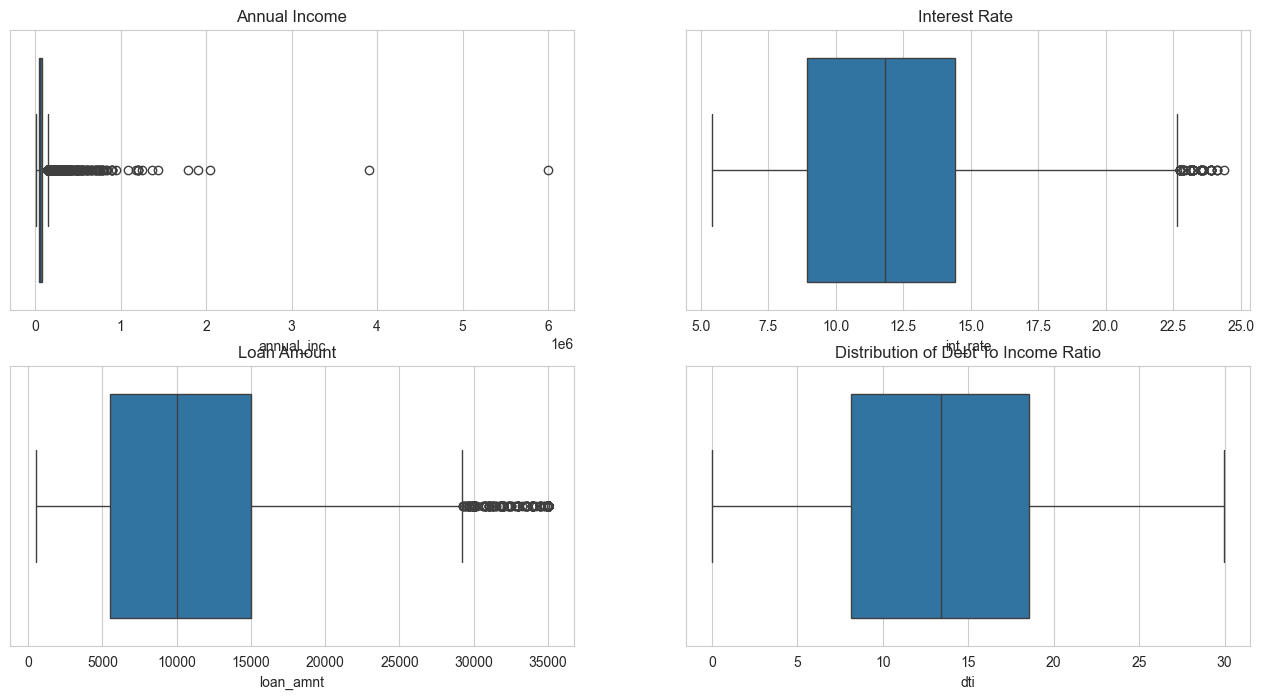

In [243]:
fig, axes = plt.subplots(2, 2, figsize=(16, 8))
# Pass the axes into seaborn
axes[0,0].set_title('Annual Income')
sns.boxplot(x='annual_inc', data=ln_DataSet,ax=axes[0,0])
axes[0,1].set_title('Interest Rate ')
sns.boxplot(x='int_rate', data=ln_DataSet,ax=axes[0,1]);
axes[1,0].set_title('Loan Amount  ')
sns.boxplot(x='loan_amnt', data=ln_DataSet,ax=axes[1,0])
axes[1,1].set_title('Distribution of Debt To Income Ratio')
sns.boxplot(x='dti', data=ln_DataSet,ax=axes[1,1])



#### Annual Income : - ## Upper fence turns out to be 146k whereas max is 6000k which is much from upper fence thus we will remove the outliers in column annual_inc.

#### Interest Rate : Upper fence turns out to be 22.64 whereas max is 24.4 which is not much more then upper fence thus will not have much impact on the analysis.

#### Loan Amount : - Upper fence turns out to be 29.175k =29175 whereas max is 35k=35000 which is not much more then upper fence thus will not have much impact on the analysis.

#### Distribution of Debt To Income Ratio :There are no outliers in dti hence we can move ahead with analysis.

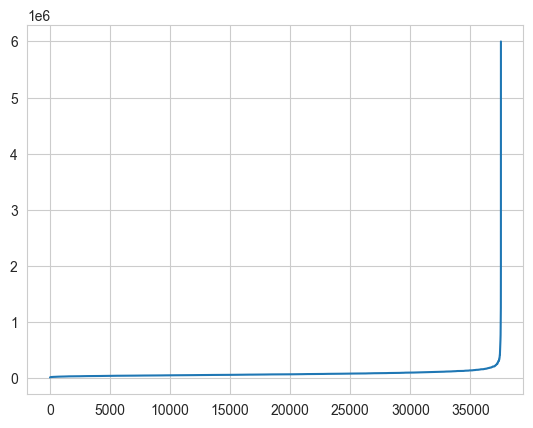

In [244]:
sns.set_style("whitegrid")
plt.plot(sorted(ln_DataSet.annual_inc));


The annual_inc is increasing in expontntial format around 99th percentile. Thus we can remove values greater than 99th percentile.

In [245]:
## Removing outliers in annual_inc greater than 99th percentile
ln_DataSet = ln_DataSet[ln_DataSet.annual_inc<=np.percentile(ln_DataSet.annual_inc,99)]

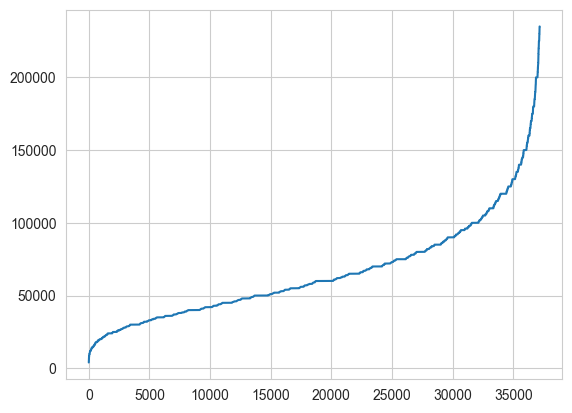

In [246]:
#Rechecking after removeal
plt.plot(sorted(ln_DataSet.annual_inc));


### Univariant Analysis

loan_status
Fully Paid     85.580932
Charged Off    14.419068
Name: count, dtype: float64


Text(0.5, 1.0, 'Loan Status')

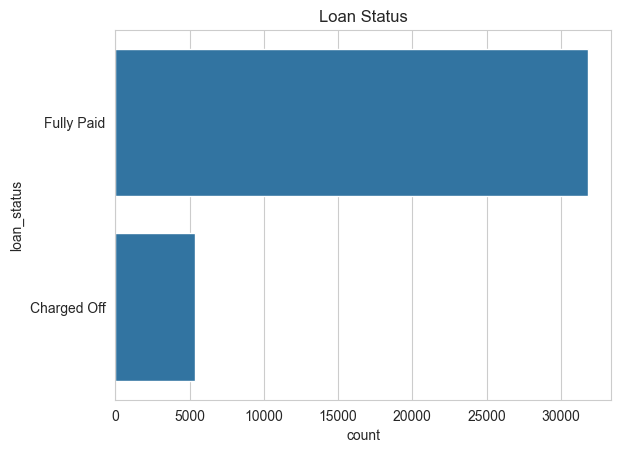

In [247]:
# Loan status 
print(ln_DataSet.loan_status.value_counts()*100/ln_DataSet.loan_status.count())
# 0=Fully Paid, 1=Charged Off
ax=sns.countplot(ln_DataSet.loan_status)
ax.set_title('Loan Status')




**observation**:Defaulted loan are low in numbers compared to Fully Paid.

Text(0.5, 1.0, 'Distribution of Interest Rate')

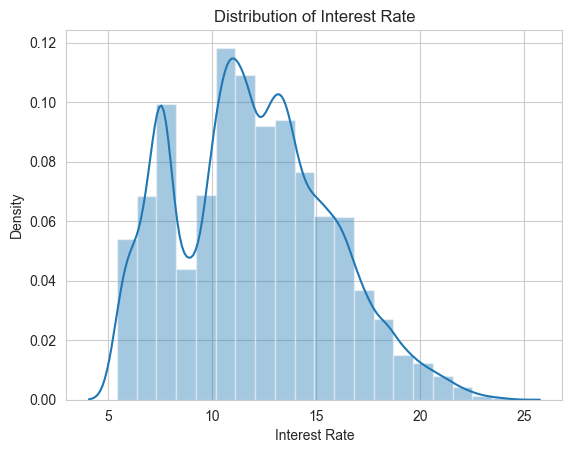

In [248]:
# Distribution of interest rate
sns.distplot(sorted(ln_DataSet.int_rate),kde=True,bins=20)
plt.xlabel('Interest Rate')
plt.ylabel('Density')
plt.title('Distribution of Interest Rate')


**observation**: The interest rate is more crowded around 5-10 and 10-15 with a drop near 10.

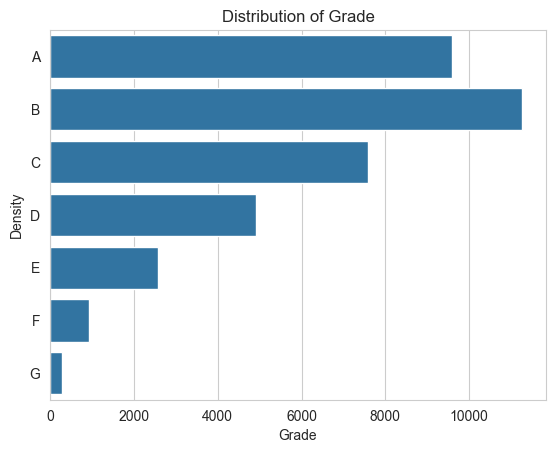

In [249]:
# Distribution of Grade
sns.countplot(sorted(ln_DataSet.grade))
plt.xlabel('Grade')
plt.ylabel('Density')
plt.title('Distribution of Grade')
plt.show()

**Observation**: A large amount of loans are with grade 'A' and 'B' commpared to rest showing most loans are high grade loans.

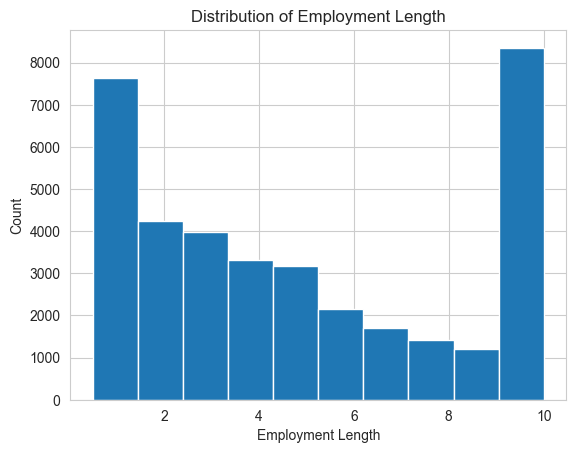

In [250]:
# Distribution of emp_length
plt.hist(ln_DataSet.emp_length);
plt.xlabel('Employment Length')
plt.ylabel('Count')
plt.title('Distribution of Employment Length',fontsize=12);


**Observation**: Majority of borrowsers have working experience less than or equal to 1 year and greater than 10 years.

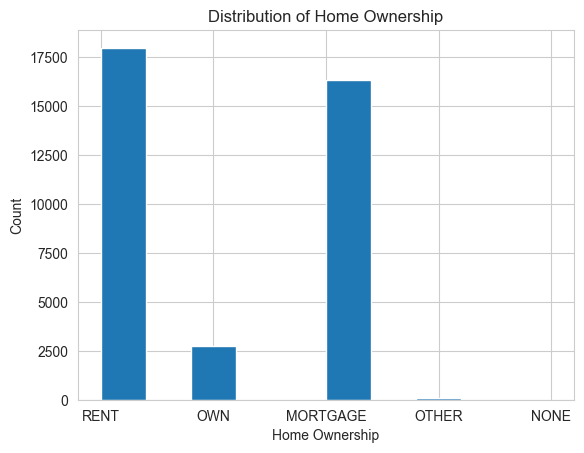

In [251]:
# Distribution of home_ownership
plt.hist(ln_DataSet.home_ownership)
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.title('Distribution of Home Ownership',fontsize=12);


**Observation**: Majority of borrowsers don't posses property and are on mortage or rent.

Text(0.5, 1.0, 'Distribution of Purpose')

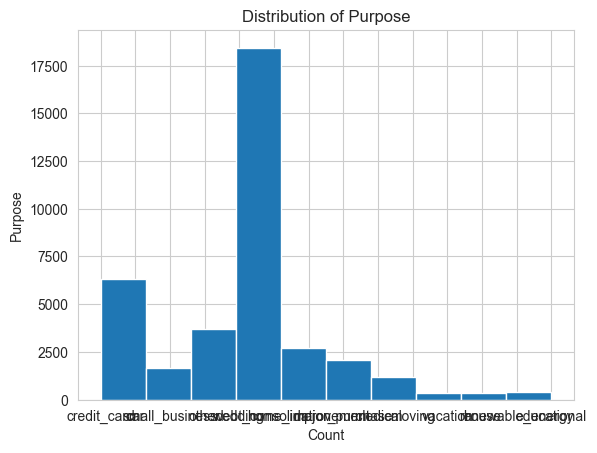

In [252]:
# Distribution of purpose
#sns.countplot(y=loan_data.purpose)
plt.hist(ln_DataSet.purpose);
plt.xlabel('Count')
plt.ylabel('Purpose')
plt.title('Distribution of Purpose',fontsize=12)


**Observation**: A large percentage of loans are taken for debt consolidation followed by credit card.

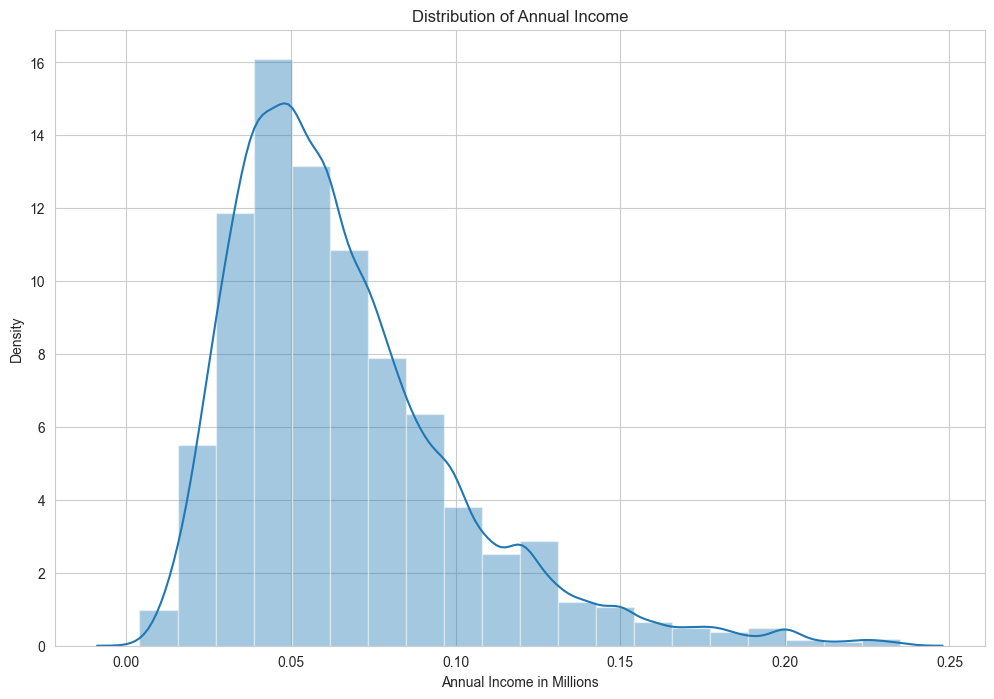

In [253]:
# Distribution of annual_inc
plt.figure(figsize=(12,8))
sns.distplot(ln_DataSet.annual_inc/1000000,kde=True,bins=20)
plt.xlabel('Annual Income in Millions')
plt.ylabel('Density')
plt.title('Distribution of Annual Income',fontsize=12);


**Observation**: Annual Income shows left skewed normal distribution thus we can say that the majority of burrowers have very low annual income compared to rest. 

Text(0.5, 1.0, 'Distribution of State')

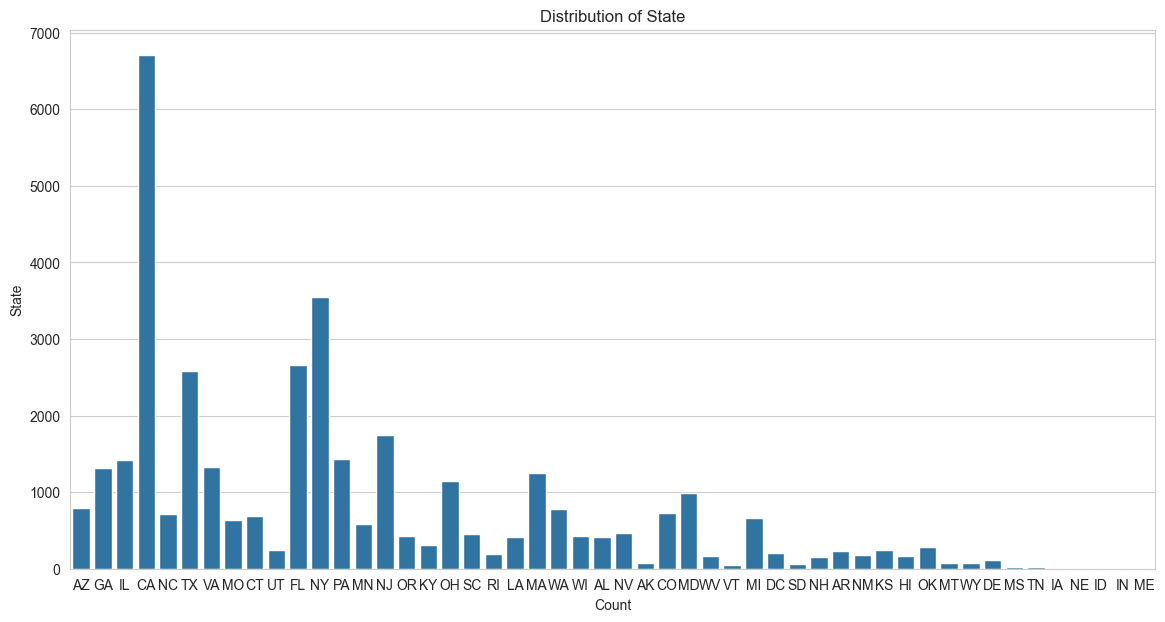

In [254]:
# Distribution of addr_state
plt.figure(figsize=(14,7))
sns.countplot(x=ln_DataSet.addr_state)
plt.xlabel('Count')
plt.ylabel('State')
plt.title('Distribution of State',fontsize=12)


**Observation**: Majority of the borrowers are from the large urban cities like california, new york, texas, florida etc.

Text(0.5, 1.0, 'Distribution of DTI ratio')

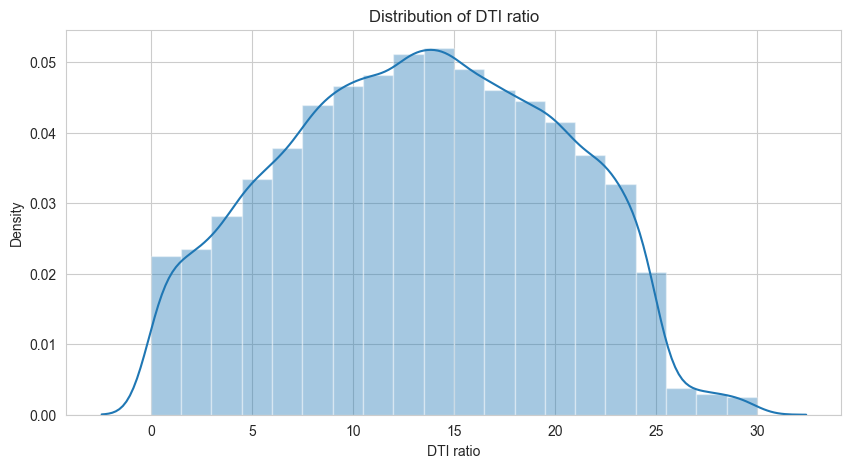

In [255]:
# Distribution of dti
plt.figure(figsize=(10,5))
sns.distplot(ln_DataSet.dti,kde=True,bins=20)
plt.xlabel('DTI ratio')
plt.ylabel('Density')
plt.title('Distribution of DTI ratio',fontsize=12)


**Observation**: Majority of the borrowers have very large debt compared to the income registerd, concentrated in the 10-15 DTI ratio.

### Segmented Univariate Analysis


<Axes: title={'center': 'Interest Rate'}, xlabel='int_rate', ylabel='Count'>

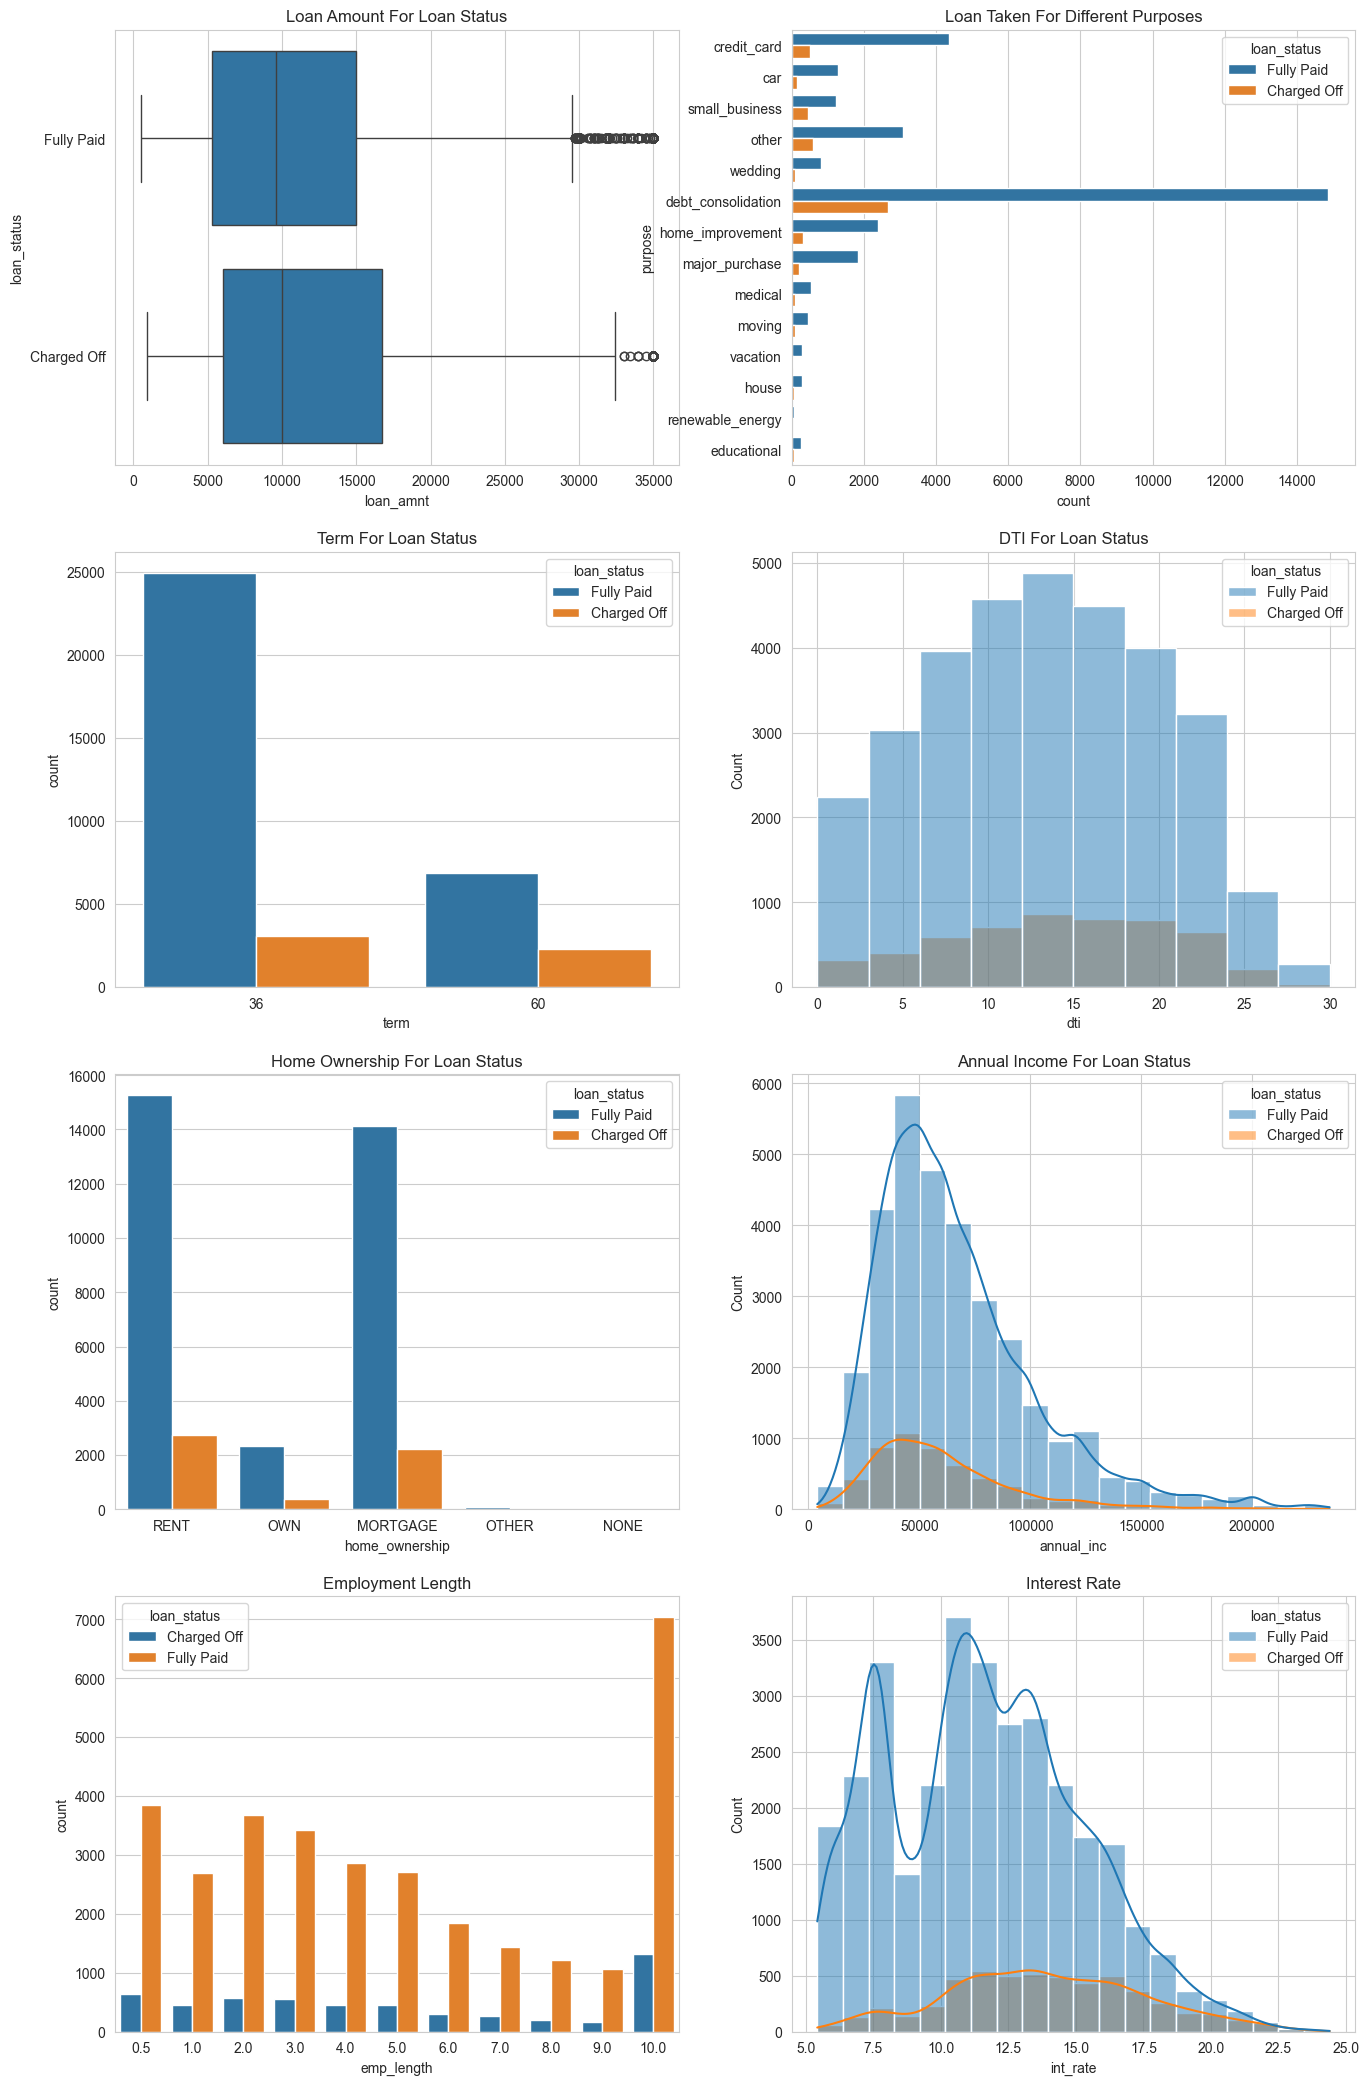

In [256]:
fig, axes = plt.subplots(4, 2, figsize=(16, 26))
# Distribution of loan_amnt based on loan_status

axes[0,0].set_title('Loan Amount For Loan Status')
sns.boxplot(data=ln_DataSet,x='loan_amnt',y='loan_status',ax=axes[0,0])


axes[0,1].set_title('Loan Taken For Different Purposes')
sns.countplot(data=ln_DataSet,y='purpose',hue='loan_status',ax=axes[0,1])

# Distribution of loan_status based on term
axes[1,0].set_title('Term For Loan Status')
sns.countplot(data=ln_DataSet,x='term',hue='loan_status',ax=axes[1,0])

# Distribution of loan_status based on dti
axes[1,1].set_title('DTI For Loan Status')
sns.histplot(data=ln_DataSet,x='dti',hue='loan_status',bins=10,ax=axes[1,1])


# Distribution of loan_status based on home_ownership
axes[2,0].set_title('Home Ownership For Loan Status')
sns.countplot(data=ln_DataSet,x='home_ownership',hue='loan_status',ax=axes[2,0])

# Distribution of annual_inc based on loan_status
axes[2,1].set_title('Annual Income For Loan Status')
sns.histplot(data=ln_DataSet,x='annual_inc',hue='loan_status',bins=20,kde=True,ax=axes[2,1])


# Distribution of emp_length based on loan_status
axes[3,0].set_title('Employment Length')
sns.countplot(data=ln_DataSet,x='emp_length',hue='loan_status',ax=axes[3,0])



# Distribution of int_amnt based on loan_status
axes[3,1].set_title('Interest Rate')
sns.histplot(data=ln_DataSet,x='int_rate',hue='loan_status', bins=20, kde=True,ax=axes[3,1])



**Loan Amount:** The mean and 25% percentile are same for both but we see larger 75% percentile in the defaulted loan which indicate large amount of loan has higher chance of defaulting.

**Loan Purpose:** Debt Consolidation is the most popular loan purpose and has highest number of fully paid loan and defaulted loan.

**Loan Term:** The 60 month term has higher chance of defaulting than 36 month term whereas the 36 month term has higher chance of fully paid loan.

**Debt-to-income:** The Loan Status varies with DTI ratio, we can see that the loans in DTI ratio 10-15 have higher number of defaulted loan but higher dti has higher chance of defaulting.

**Home Ownership:** The Defaulted loan are lower for the burrowers which own their property compared to on mortgage or rent.

**Annual Income Range:** Burrowers with less 50000 annual income are more likely to default and higher annual income are less likely to default.

**Employment service length:** The Employees with 10+ years of experience are likely to default and have higher chance of fully paying the loan.

**Interest Rate:** The default loan amount increases with interest rate and shows are decline aftre 17.5 % interest rate.


### Bivariate Analysis

<Axes: title={'center': 'DTI Based On Grade For Loan Status'}, xlabel='dti', ylabel='grade'>

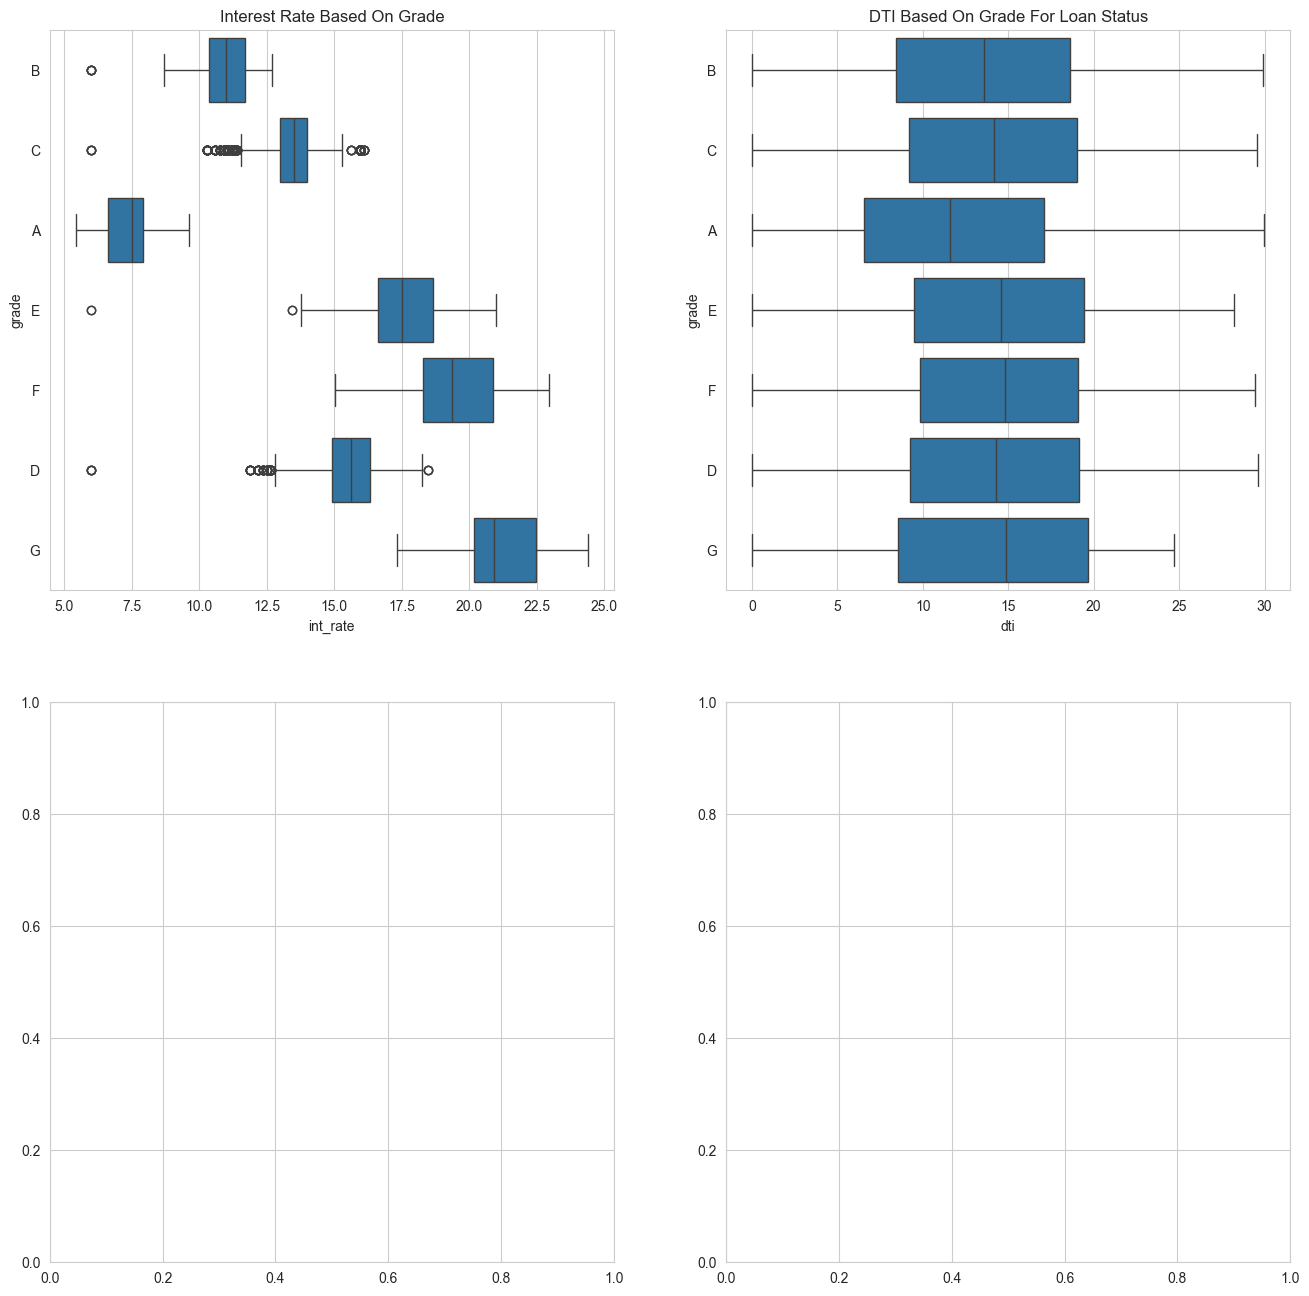

In [257]:
fig, axes = plt.subplots(2, 2, figsize=(16, 16))

axes[0,0].set_title('Interest Rate Based On Grade')
sns.boxplot(data=ln_DataSet,x='int_rate',y='grade',ax=axes[0,0])

axes[0,1].set_title('DTI Based On Grade For Loan Status')
sns.boxplot(data=ln_DataSet,x='dti',y='grade',ax=axes[0,1])



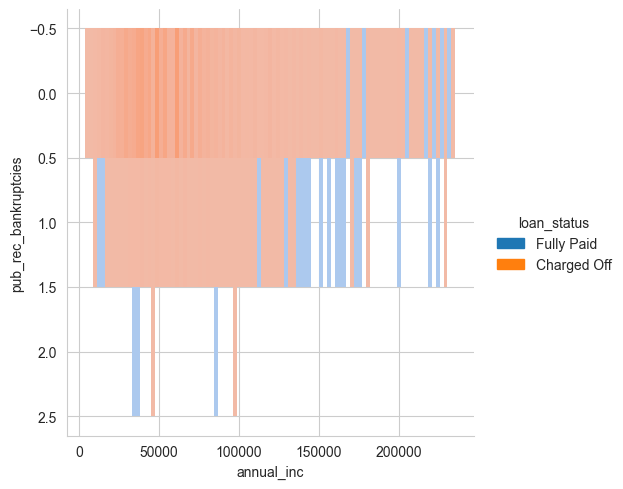

In [258]:
sns.displot(y=ln_DataSet.pub_rec_bankruptcies.astype('category'),x=ln_DataSet.annual_inc,hue=ln_DataSet.loan_status);


**Observation:** The brrowers are mostly having no record of Public Recorded Bankruptcy and are safe choice for loan issue.

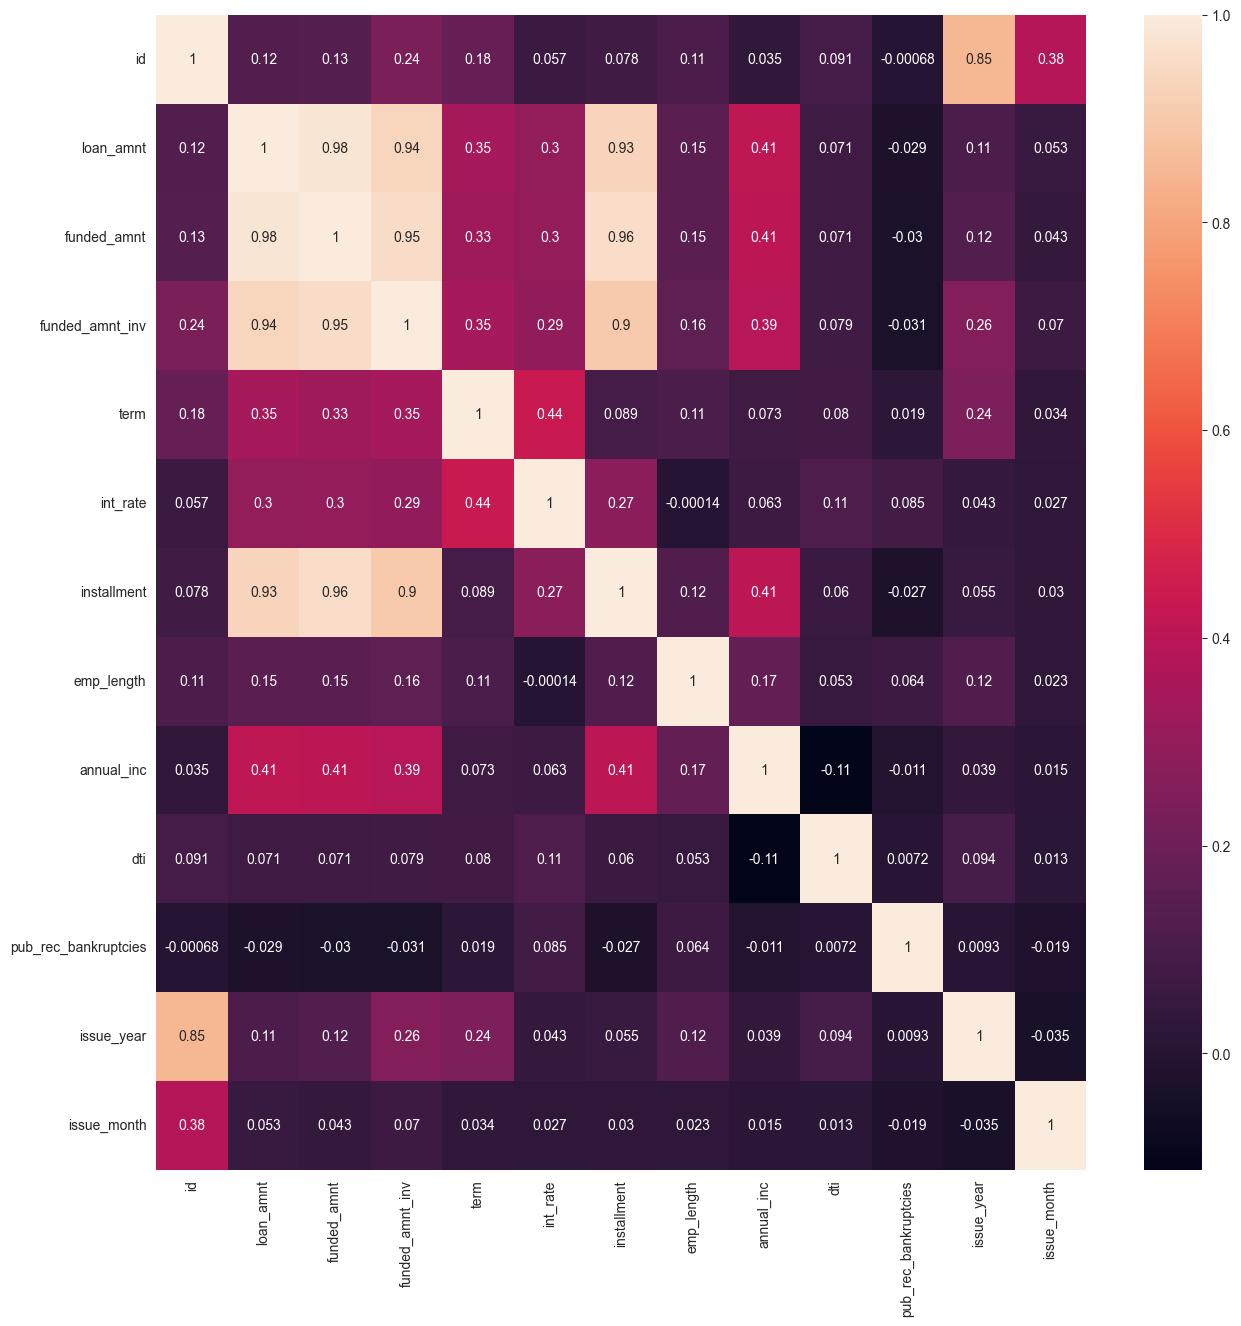

In [259]:
# Heatmap of correlation between variables
plt.figure(figsize=(15,15))
numeric_data = ln_DataSet.select_dtypes(include=[np.number])
sns.heatmap(numeric_data.corr(),annot=True);


- The Grade represent risk factor thus we can say interst rate increases with the risk.
- The Grade A which is lowest risk also has lowest DTI ratio which we can say that higher grade has lower rate of default.
- The brrowers are mostly having no record of Public Recorded Bankruptcy and are safe choice for loan issue.


## Conclusion
- Major Driving factor which can be used to predict the chance of defaulting and avoiding Credit Loss:
    1. Annual income 
    2. Grades
    3. Employment lenght
    4. Debt to Income ration DTI
    5. Pub_rec_bankruptcies
- Other considerations for 'defaults' :
    1. Burrowers not from large urban cities like california, new york, texas, florida etc.
    2. Burrowers having annual income in the range 50000-100000.
    3. Burrowers with working experience 10+ years.
    4. Burrowers having Public Recorded Bankruptcy.
    5. Burrowers with very high Debt to Income value.
  